<a href="https://colab.research.google.com/github/ChayanGhosh1412/Wine-Quality-Prediction-Ensemble-Learning/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
palette = sns.color_palette('plasma')

In [ ]:
from google.colab import files
data=files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

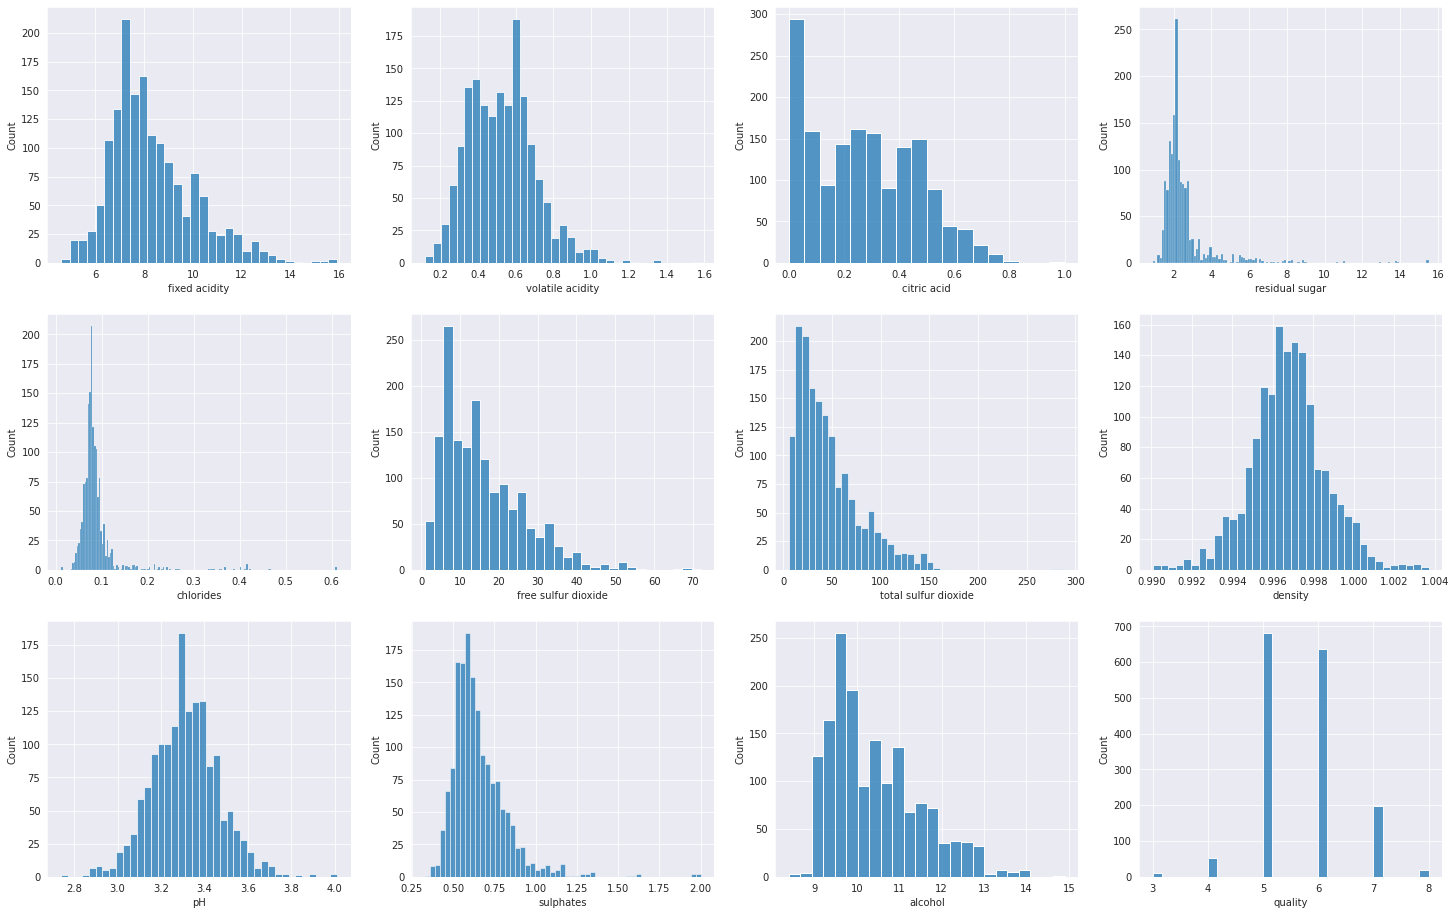

In [ ]:
fig , axs = plt.subplots(3,4 , figsize=(25 , 16))

for f , ax in zip(df.columns , axs.ravel()):
    sns.histplot(data=df , x=f , ax=ax )
plt.show()

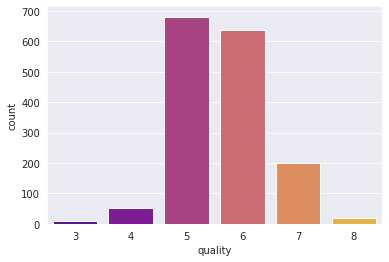

In [ ]:
sns.countplot(data=df , x='quality' , palette=palette);

In [ ]:
# correlation
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

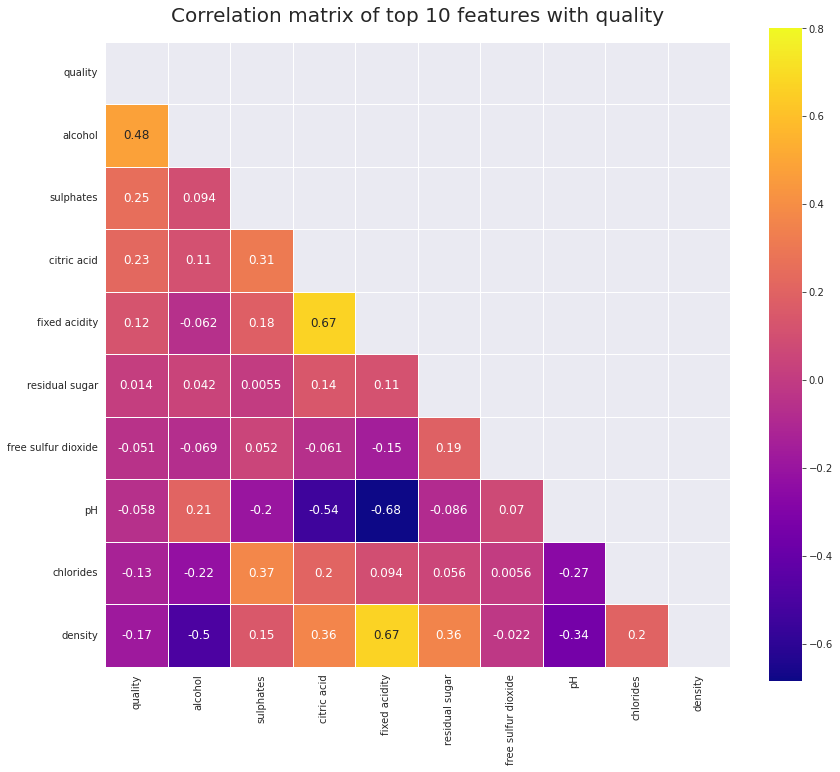

In [ ]:
correlation = df.corr()
top_k = 10
cols = correlation.nlargest(top_k, 'quality').index

# Computing the correlation matrix between the selected columns
corr_matrix = np.corrcoef(df[cols].to_numpy().T)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Creating a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, mask=mask, vmax=.8, linewidths=0.5, square=True, annot=True,
            cmap='plasma', annot_kws={'size': 12}, xticklabels=cols, yticklabels=cols)

# Adding title to the plot
plt.title(f'Correlation matrix of top {top_k} features with quality', fontsize=20, pad=20)

# Increasing the size of axes values
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

plt.show()

In [ ]:
#preprocessing data
df['quality'] = df['quality'].replace([3,4,5] , 0)
df['quality'] = df['quality'].replace([6,7,8] , 1)

In [ ]:
X = df.drop('quality' , axis=1)
y = df['quality']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.3 , random_state=101)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Using Bagging Method**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, random_state=42)

In [ ]:
models = []
models.append(('Random Forest', RandomForestClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('SVM', SVC()))

In [ ]:
bagging = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True)

In [ ]:
for name, model in models:
    bagging.base_estimator_ = model
    bagging.fit(X_train, y_train)
    y_pred = bagging.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("%s: %.2f%%" % (name, accuracy * 100))

Random Forest: 77.50%
LogisticRegression: 79.58%
SVM: 80.21%
